In [1]:
import requests
from bs4 import BeautifulSoup

## Imports/Exports for USA

In [2]:
# Get the Webpage
url = 'https://wits.worldbank.org/CountrySnapshot/en/USA'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the Imports Section
import_label = soup.find('a', title='United States  Imports (in US$ Mil) between 2017 and 2021')

# Print the Imports Data
if import_label:
    us_import_value = import_label.find_parent('tr').find_all('td', class_='alignRight data')[0].text.strip()
    us_import_value = int(us_import_value.replace(',', ''))
    print(f"Imports: {us_import_value}")
else: print("Imports label not found.")

# Extract the Exports Section
export_label = soup.find('a', title='United States  Exports (in US$ Mil) between 2017 and 2021')

# Print the Exports Data
if export_label:
    us_export_value = export_label.find_parent('tr').find_all('td', class_='alignRight data')[0].text.strip()
    us_export_value = int(us_export_value.replace(',', ''))
    print(f"Exports: {us_export_value}")
else: print("Exports label not found.")

Imports: 3372902
Exports: 2062090


## Import/Exports for China

In [3]:
# Get the Webpage
url = 'https://wits.worldbank.org/CountrySnapshot/en/CHN'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract the Imports Section
import_label = soup.find('a', title='China  Imports (in US$ Mil) between 2017 and 2021')

# Print the Imports Data
if import_label:
    cn_import_value = import_label.find_parent('tr').find_all('td', class_='alignRight data')[0].text.strip()
    cn_import_value = int(cn_import_value.replace(',', ''))
    print(f"Imports: {cn_import_value}")
else: print("Imports Label Not Found.")

# Extract the Exports Section
export_label = soup.find('a', title='China  Exports (in US$ Mil) between 2017 and 2021')

# Print the Exports Data
if export_label:
    cn_export_value = export_label.find_parent('tr').find_all('td', class_='alignRight data')[0].text.strip()
    cn_export_value = int(cn_export_value.replace(',', ''))
    print(f"Exports: {cn_export_value}")
else: print("Exports Label Not Found.")

Imports: 2715998
Exports: 3593601


## Imports/Exports Visualization

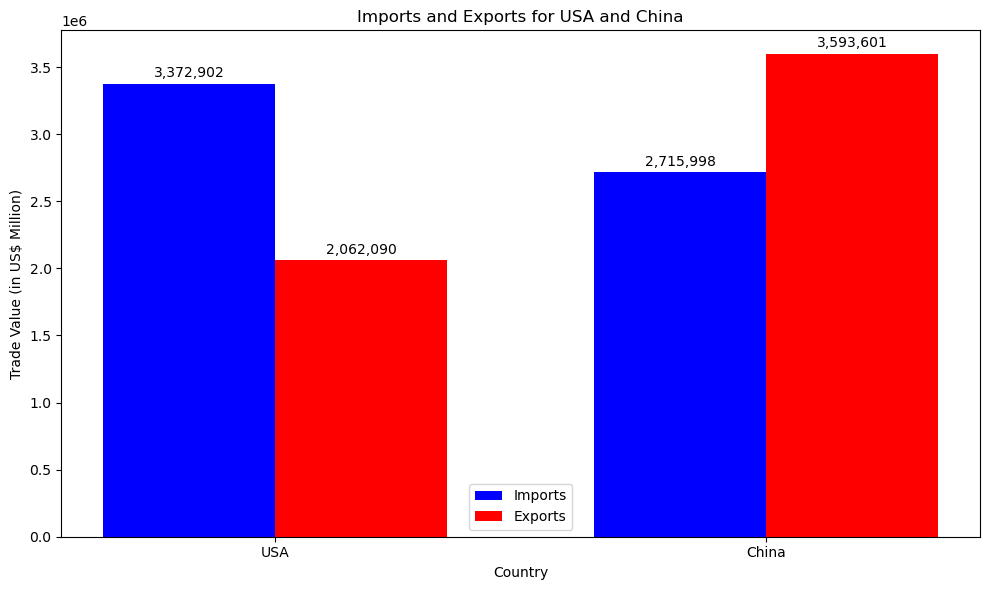

In [4]:
import matplotlib.pyplot as plt
import numpy as np

countries = ['USA', 'China']
imports = [us_import_value, cn_import_value] 
exports = [us_export_value, cn_export_value]

x = np.arange(len(countries))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, imports, width, label='Imports', color='blue')
bars2 = ax.bar(x + width/2, exports, width, label='Exports', color='red')

ax.set_xlabel('Country')
ax.set_ylabel('Trade Value (in US$ Million)')
ax.set_title('Imports and Exports for USA and China')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01 * yval, f'{yval:,}', ha='center', va='bottom')
add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()

In [5]:
import csv

# Preparing the data
data = [
    ["Country", "Imports (in US$ Million)", "Exports (in US$ Million)"],
    ["USA", us_import_value, us_export_value],
    ["China", cn_import_value, cn_export_value]
]

# Generating the CSV file
csv_filename = "us_cn_trade.csv"
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

print(f"CSV file '{csv_filename}' has been generated successfully!")

CSV file 'us_cn_trade.csv' has been generated successfully!


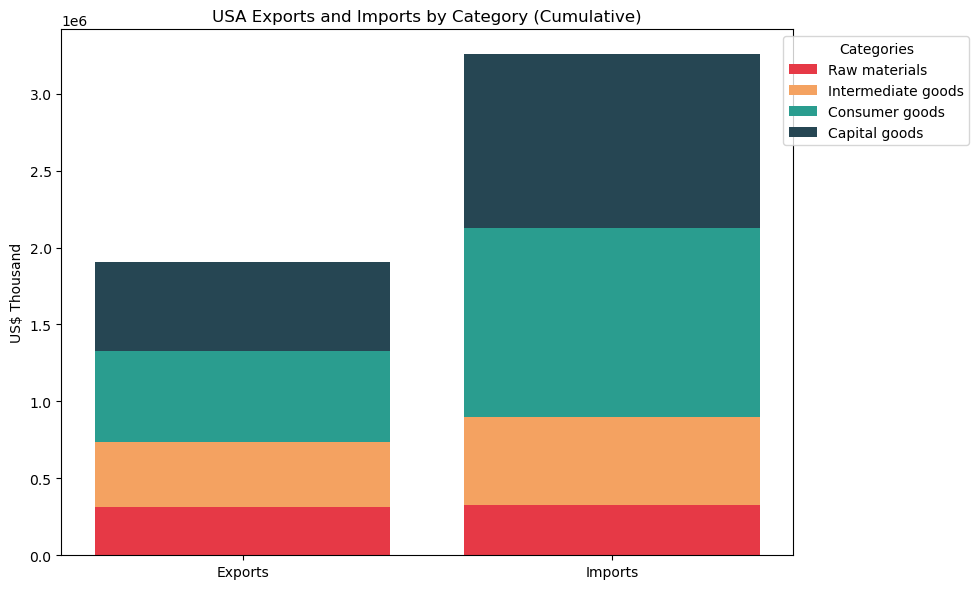

In [6]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

export_html_content = """
<tr><td class="data alignRight"><a href="https://wits.worldbank.org/CountryProfile/en/Country/USA/StartYear/2017/EndYear/2021/TradeFlow/Export/Indicator/XPRT-TRD-VL/Partner/WLD/Product/stages-of-processing" title="United States Export (US$ Thousand) of Products by Stages of Processing to World between 2017 and 2021">315196</a></td></tr>
<tr><td class="data alignRight"><a href="https://wits.worldbank.org/CountryProfile/en/Country/USA/StartYear/2017/EndYear/2021/TradeFlow/Export/Indicator/XPRT-TRD-VL/Partner/WLD/Product/stages-of-processing" title="United States Export (US$ Thousand) of Products by Stages of Processing to World between 2017 and 2021">424065</a></td></tr>
<tr><td class="data alignRight"><a href="https://wits.worldbank.org/CountryProfile/en/Country/USA/StartYear/2017/EndYear/2021/TradeFlow/Export/Indicator/XPRT-TRD-VL/Partner/WLD/Product/stages-of-processing" title="United States Export (US$ Thousand) of Products by Stages of Processing to World between 2017 and 2021">589746</a></td></tr>
<tr><td class="data alignRight"><a href="https://wits.worldbank.org/CountryProfile/en/Country/USA/StartYear/2017/EndYear/2021/TradeFlow/Export/Indicator/XPRT-TRD-VL/Partner/WLD/Product/stages-of-processing" title="United States Export (US$ Thousand) of Products by Stages of Processing to World between 2017 and 2021">575941</a></td></tr>
"""

import_html_content = """
<tr><td class="data alignRight"><a href="https://wits.worldbank.org/CountryProfile/en/Country/USA/StartYear/2017/EndYear/2021/TradeFlow/Import/Indicator/XPRT-TRD-VL/Partner/WLD/Product/stages-of-processing" title="United States Import (US$ Thousand) of Products by Stages of Processing to World between 2017 and 2021">326769</a></td></tr>
<tr><td class="data alignRight"><a href="https://wits.worldbank.org/CountryProfile/en/Country/USA/StartYear/2017/EndYear/2021/TradeFlow/Import/Indicator/XPRT-TRD-VL/Partner/WLD/Product/stages-of-processing" title="United States Import (US$ Thousand) of Products by Stages of Processing to World between 2017 and 2021">574154</a></td></tr>
<tr><td class="data alignRight"><a href="https://wits.worldbank.org/CountryProfile/en/Country/USA/StartYear/2017/EndYear/2021/TradeFlow/Import/Indicator/XPRT-TRD-VL/Partner/WLD/Product/stages-of-processing" title="United States Import (US$ Thousand) of Products by Stages of Processing to World between 2017 and 2021">1224607</a></td></tr>
<tr><td class="data alignRight"><a href="https://wits.worldbank.org/CountryProfile/en/Country/USA/StartYear/2017/EndYear/2021/TradeFlow/Import/Indicator/XPRT-TRD-VL/Partner/WLD/Product/stages-of-processing" title="United States Import (US$ Thousand) of Products by Stages of Processing to World between 2017 and 2021">1129509</a></td></tr>
"""

def extract_values(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    return [int(tag.text.replace(',', '')) for tag in soup.find_all('a')]

categories = ["Raw materials", "Intermediate goods", "Consumer goods", "Capital goods"]
export_values = extract_values(export_html_content)
import_values = extract_values(import_html_content)

data = {
    'Category': categories,
    'Exports': export_values,
    'Imports': import_values
}

# Create a bar plot with corrected legend handling
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for the categories
colors = ["#e63946", "#f4a261", "#2a9d8f", "#264653"]

# Initialize bottom values for stacking
bottom_export = 0
bottom_import = 0

# Plot each category
for i, category in enumerate(categories):
    # Add bars for exports and imports, using the same category label for the first bar
    ax.bar(["Exports"], data['Exports'][i], bottom=bottom_export, color=colors[i], label=category)
    ax.bar(["Imports"], data['Imports'][i], bottom=bottom_import, color=colors[i])
    
    # Update the bottom values
    bottom_export += data['Exports'][i]
    bottom_import += data['Imports'][i]

# Set plot titles and labels
ax.set_title('USA Exports and Imports by Category (Cumulative)')
ax.set_ylabel('US$ Thousand')
ax.set_xticks([0, 1])
ax.set_xticklabels(["Exports", "Imports"])

# Add the legend (ensure labels are displayed only once)
ax.legend(title="Categories", loc='upper right', bbox_to_anchor=(1.25, 1))

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()
